In [1]:
# start
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sales_2017 = pd.read_csv("./seoul_2017.csv", engine='python')

# 순서
# 1. csv파일 불러오기
# 2. 데이터 필터링
# 3. 매출 or 유동인구 별 함수
# 4.

In [2]:
ploating_people = pd.read_csv("./seoul_population.csv", engine='python')

In [3]:
sales_2018 = pd.read_csv("./seoul_2018.csv", engine='python')

In [4]:
# 업종 필터링
def filtering(data):
    # 주말 매출비율이 0인 업종 제외
    is_ratio_not_0 = data['주말_매출_비율'] != 0
    data_f = data[is_ratio_not_0]
    
    # 대형마트와 비교해서 관계없는 업종 제외
    exception = ['노래방','미용실','스포츠클럽','스포츠 강습','세무사사무소',
                '일반교습학원','일반의원','치과의원', '법무사사무소', '변호사사무소',
                '한의원','볼링장', 'PC방', '고시원', '골프연습장','부동산중개업',
                '네일숍','당구장','독서실','외국어학원','여관','예술학원',
                '일반교습학원','여행사','회계사사무소','주유소',
                 '네일숍', '피부관리실'
                ]
    S_exception = ['노래방','미용실','스포츠클럽','스포츠 강습','세무사사무소',   
                '일반교습학원','일반의원','치과의원', '법무사사무소', '변호사사무소',
                '한의원','볼링장', 'PC방', '고시원', '골프연습장','부동산중개업',
                '네일숍','당구장','독서실','외국어학원','여관','예술학원',
                '일반교습학원','여행사','회계사사무소','주유소', '일반의류'
                '네일숍', '피부관리실', '시계및귀금속', '화초', '가방',
                '핸드폰', '안경','의약품','가구','가전제품수리','가전제품',
                '통신기기수리', '문구', '신발', '사진관', '서적','세탁소','섬유제품',
                '악기','안경','애완동물','예술품','완구','의료기기','인테리어',
                '컴퓨터및주변장치판매', '자동차미용','자동차부품','자동차수리'
                ]
    
    data_f = data_f[(data_f['서비스_업종_코드_명'].isin(S_exception) == False)]
    return data_f

In [5]:
# 시장 주중평균, 토요일, 일요일 매출합계
def market_cal(market_name, data): 
    column = ['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액'
             ,'목요일_매출_금액','금요일_매출_금액','토요일_매출_금액','일요일_매출_금액']
    week = []
        
    # 분기 별 데이터
    for i in range(4):
        day = []
        market = data[(data['상권_코드_명'] == market_name) & (data['기준_분기_코드'] == i+1)]
        
        #요일 데이터
        for j in column:
            day.append(market[j].sum())
        week.append(day)
    
    #뒤집기
    week = list(map(list,zip(*week)))
            
    return week

In [6]:
# 시장 유동인구
def floating_pop(market_name, data, year):
    column = ['월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수'
             ,'금요일_유동인구_수','토요일_유동인구_수','일요일_유동인구_수']
    week = []
    
    # 분기 별 데이터
    for i in range(4):
        day = []
        market = data[(data['상권_코드_명'] == market_name) & (data['기준_분기_코드'] == i+1) & (data['기준 년코드'] == year)]
        
        #요일 데이터
        for j in column:
            day.append(market[j].sum())
        week.append(day)
    
    #뒤집기
    week = list(map(list,zip(*week)))
            
    return week

In [7]:
# 분기 별 추이 그래프
def print_graph_quarter(week):
    
    x = ['1q','2q','3q','4q']
    plt.figure(figsize=(7.5,7.5))
    plt.plot(x, week[0],label="weekday", marker="*", color='grey')
    plt.plot(week[1], marker="*", color='grey')
    plt.plot(week[2], marker="*", color='grey')
    plt.plot(week[3], marker="*", color='grey')
    plt.plot(week[4], marker="*", color='grey')
    sat = plt.plot(week[5],label="Sat", marker="*", color='blue')
    sun = plt.plot(week[6],label="Sun", marker="*", color='red')
    plt.legend()
    plt.xlim(-0.5,3.5)
    plt.xlabel('Quarter')
    plt.ylabel('Sales')
    plt.show()

# 2년치 추이
# 매출 단위 알아야함
def print_graph_quarter_2(week1, week2):
    week = list(map(list.__add__,week1,week2))
    
    x = ['2017_1q','2017_2q','2017_3q','2017_4q','2018_1q','2018_2q','2018_3q','2018_4q',]
    plt.figure(figsize=(10,5))
    plt.plot(x, week[0],label="weekday", marker="*", color='grey')
    plt.plot(week[1], marker="*", color='grey')
    plt.plot(week[2], marker="*", color='grey')
    plt.plot(week[3], marker="*", color='grey')
    plt.plot(week[4], marker="*", color='grey')
    sat = plt.plot(week[5],label="Sat", marker="*", color='blue')
    sun = plt.plot(week[6],label="Sun", marker="*", color='red')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Quarter')
    plt.ylabel('Sales')
    plt.show()
    
#print_graph_quarter(mangwon_sales_2017)

In [8]:
# 유동인구 그래프
def print_graph_quarter_pop(week):
    df = pd.DataFrame()
    df['days'] = ['Mon','The','Wed','Thu','Fri','Sat','Sun']
    
    x = ['1q','2q','3q','4q']
    plt.figure(figsize=(7.5,7.5))
    plt.plot(x, week[0],label="weekday", marker="*", color='grey')
    plt.plot(week[1], marker="*", color='grey')
    plt.plot(week[2], marker="*", color='grey')
    plt.plot(week[3], marker="*", color='grey')
    plt.plot(week[4], marker="*", color='grey')
    sat = plt.plot(week[5],label="Sat", marker="*", color='blue')
    sun = plt.plot(week[6],label="Sun", marker="*", color='red')
    plt.legend()
    plt.xlim(-0.5,3.5)
    plt.xlabel('Quarter')
    plt.ylabel('PP')
    plt.show()

In [9]:
# 일별 유동인구 + 매출 차이 그래프
# 1년치 4개 그래프로, 비율
def print_pop_and_sales(pop, sale):
    x = ['Mon','The','Wed','Thu','Fri','Sat','Sun']
    y = np.arange(0,1,0.2)
    #뒤집기
    pop = list(map(list,zip(*pop)))
    sale = list(map(list,zip(*sale)))
    pop_r = []
    sale_r = []
    
    #비율
    for i in range(4):
        temp_pop = []
        temp_sale = []
        for j in range(7):
            temp_pop.append(round(pop[i][j] / sum(pop[i]),3))
            temp_sale.append(round(sale[i][j] / sum(sale[i]),3))
        pop_r.append(temp_pop)
        sale_r.append(temp_sale)
    
    fig = plt.figure(figsize = (15,10))
    
    axes = fig.subplots(nrows=2, ncols=2)  
    
    axes[0, 0].plot(x, sale_r[0],label="sale_ratio", marker="*")
    axes[0, 0].plot(pop_r[0],label="pop_ratio", marker="*")
    axes[0, 0].set_ylim([0.07,0.22])
    axes[0, 0].grid()
    
    axes[0, 1].plot(x, sale_r[1],label="sale", marker="*")
    axes[0, 1].plot(pop_r[1],label="pop", marker="*")
    axes[0, 1].set_ylim([0.07,0.22])
    axes[0, 1].grid()
    
    axes[1, 0].plot(x, sale_r[2],label="sale", marker="*")
    axes[1, 0].plot(pop_r[2],label="pop", marker="*")
    axes[1, 0].set_ylim([0.07,0.22])
    axes[1, 0].grid()
    
    axes[1, 1].plot(x, sale_r[3],label="sale_ratio", marker="*")
    axes[1, 1].plot(pop_r[3],label="pop_ratio", marker="*")
    axes[1, 1].set_ylim([0.07,0.22])
    axes[1, 1].grid()
    
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    
    fig.legend(lines, labels, loc = 'upper right')
    
    plt.show()

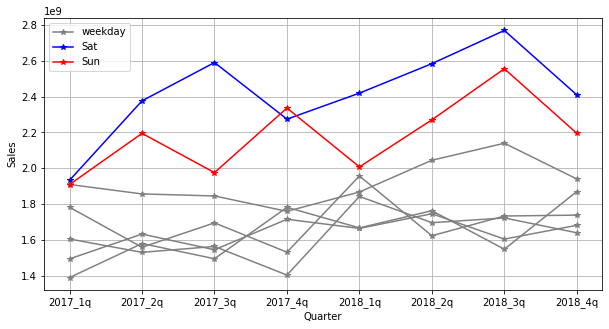

In [10]:
#시장 별 2년치 요일 매출 그래프
sales_2017_f = filtering(sales_2017)
sales_2018_f = filtering(sales_2018)
mangwon_sales_2017 = market_cal("망원시장",sales_2017_f)
mangwon_sales_2018 = market_cal("망원시장",sales_2018_f)
print_graph_quarter_2(mangwon_sales_2017,mangwon_sales_2018)

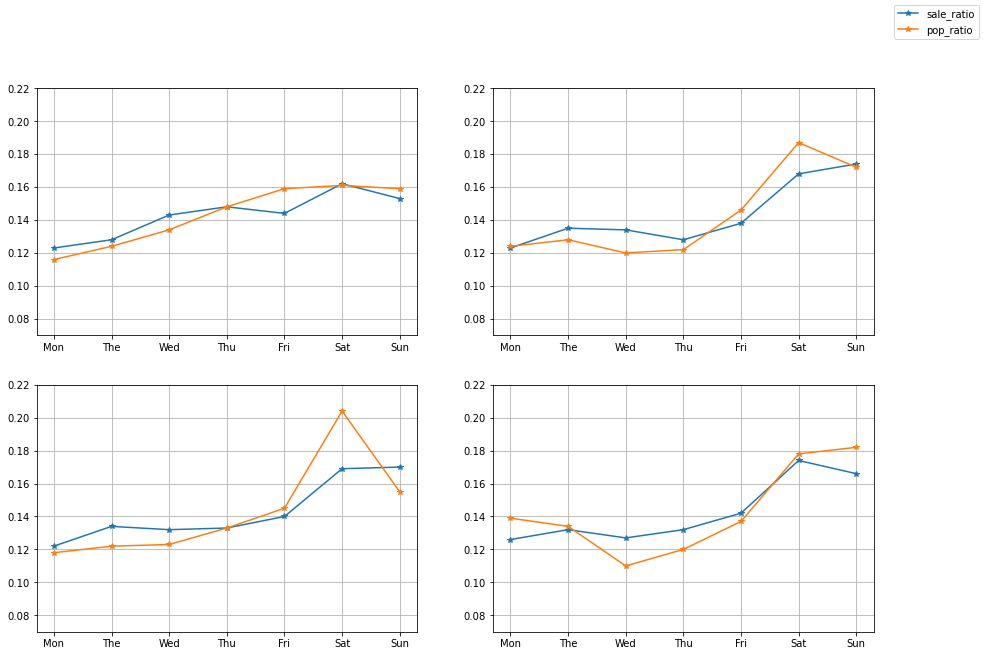

In [11]:
# 시장, 연도 별 유동인구, 매출 비율
mangwon_pop_2017 = floating_pop('망원시장',ploating_people, 2017)
print_pop_and_sales(mangwon_sales_2017,mangwon_pop_2017)

In [12]:
market_cal("망원시장",sales_2017_f)

[[1391042822, 1580563466, 1495979724, 1782568036],
 [1495063189, 1633506194, 1545929833, 1716132383],
 [1605908135, 1531515630, 1564503105, 1404833867],
 [1782806823, 1559858522, 1695889171, 1532424498],
 [1910012800, 1857264210, 1846002941, 1760237774],
 [1933452423, 2376484532, 2589971502, 2274366881],
 [1909714608, 2194959153, 1976148608, 2336156112]]

In [13]:
# 시장 분기 별 점포 당 매출
def sales_per_store_q(market_name, data):
    quarter = []
    for i in range(4):
        market = data[(data['상권_코드_명'] == market_name) & (data['기준_분기_코드'] == i+1)]
        quarter.append(round(market['당월_매출_금액'].sum() / market["점포수"].sum())) # 당월X -> 당분기
    
    return quarter

# 시장 점보 당 연매출
def sales_per_store_y(market_name, data):
    year = 0
    for i in range(4):
        market = data[(data['상권_코드_명'] == market_name) & (data['기준_분기_코드'] == i+1)]
        year += round(market['당월_매출_금액'].sum() / market["점포수"].sum())
    
    return year

# 시장 연매출
def sales_per_years(market_name, data):
    year = 0
    for i in range(4):
        market = data[(data['상권_코드_명'] == market_name) & (data['기준_분기_코드'] == i+1)]
        year += market['당월_매출_금액'].sum()
    return year
    
print(sales_per_store_q("광장시장", sales_2017_f))
sales_per_store_y("광장시장", sales_2017_f)

[22752364.0, 21751205.0, 22499333.0, 27293165.0]


94296067.0

In [14]:
# 규모 별 시장 구분
def scales_market(data):
    # 분기코드 = 가장 최근 점포 수
    market = data[(data['상권_구분_코드_명'] == "전통시장") & (data['기준_분기_코드'] == 4)]
    market_list = market['상권_코드_명'].tolist()
    market_list = sorted(list(set(market_list)))

    large = []
    medium = []
    small = []
    scale = []
    for i in market_list:
        market_ = market[market["상권_코드_명"] == i]
        if market_["점포수"].sum() >= 600:
            large.append([i, market_["점포수"].sum()])
        elif market_["점포수"].sum() >= 100:
            medium.append([i, market_["점포수"].sum()])
        elif market_["점포수"].sum() >= 20:
            small.append([i, market_["점포수"].sum()])
            
    scale.extend([large, medium, small])
    
    for i in range(3):
        scale[i].sort(key = lambda x : x[1], reverse=True)

    return scale

def scales_market_a(data):
    # 분기코드 = 가장 최근 점포 수
    market = data[(data['상권_구분_코드_명'] == "전통시장") & (data['기준_분기_코드'] == 4)]
    market_list = market['상권_코드_명'].tolist()
    market_list = sorted(list(set(market_list)))

    scale = []
    for i in market_list:
        market_ = market[market["상권_코드_명"] == i]
        scale.append([i, market_["점포수"].sum()])
    
    for i in range(3):
        scale.sort(key = lambda x : x[1], reverse=True)

    return scale
# scales_market_a(sales_2017_f)

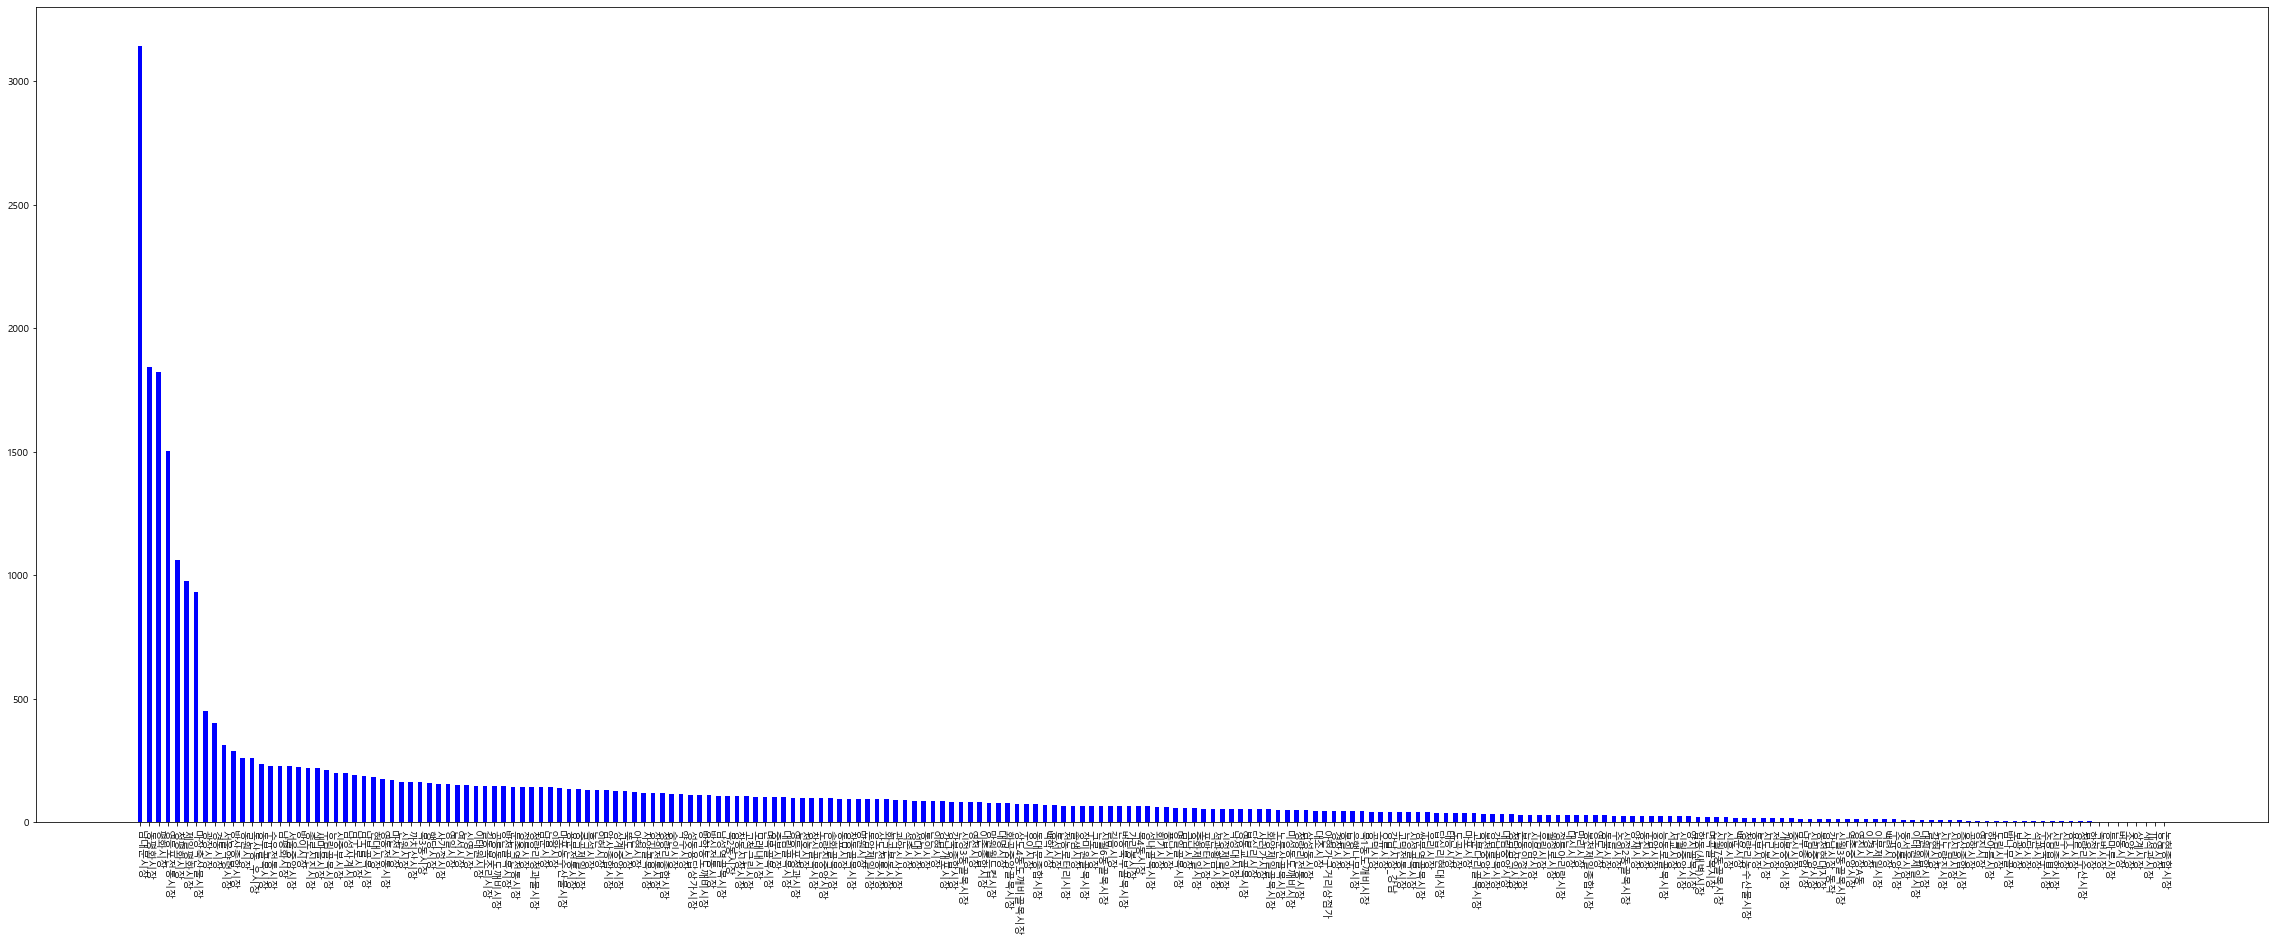

In [15]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

total_scale = scales_market_a(sales_2017_f)
m_n = []
m_num = []
for i in range(len(total_scale)):
    m_n.append(total_scale[i][0])
    m_num.append(total_scale[i][1])
    
xxx = range(len(m_n))

fig = plt.figure(figsize = (40,15))
plt.bar(xxx,m_num, color='b',width=0.5)
plt.xticks(xxx, m_n,rotation=-90)
plt.show()

In [46]:
def market_don(data):
    # 분기코드 = 가장 최근 점포 수
    market = data[(data['상권_구분_코드_명'] == "전통시장") & (data['기준_분기_코드'] == 4)]
    market_list = market['상권_코드_명'].tolist()
    market_list = sorted(list(set(market_list)))
    print(len(market_list))
    scale = []
    for i in market_list:
        market_ = market[market["상권_코드_명"] == i]
        sales = market_["당월_매출_금액"].sum()
        mar_num = market_["점포수"].sum()
        scale.append([i, round(sales/mar_num)])
    
    for i in range(3):
        scale.sort(key = lambda x : x[1], reverse=True)

    return scale
market_don(sales_2017_f)

218


<ipython-input-46-3f953b773821>:12: RuntimeWarning: divide by zero encountered in longlong_scalars
  scale.append([i, round(sales/mar_num)])


[['논현종합시장', inf],
 ['마포농수산물시장', 337566829.0],
 ['영진시장A동', 298838088.0],
 ['신신림시장', 276938785.0],
 ['봉천현대시장', 275241717.0],
 ['마장축산물시장', 260923059.0],
 ['개봉중앙시장', 254312876.0],
 ['청량리종합시장', 216122529.0],
 ['수유북부시장', 214780790.0],
 ['독산동 우시장', 171098958.0],
 ['대조시장', 144375064.0],
 ['양지골목시장', 141320668.0],
 ['망원시장', 136241697.0],
 ['이촌종합시장', 131290768.0],
 ['만리시장', 128230339.0],
 ['신림종합시장', 126065638.0],
 ['후암시장', 122511844.0],
 ['이태원제일시장', 122396645.0],
 ['경동시장', 120616835.0],
 ['신도봉시장', 117562519.0],
 ['전곡시장', 116459757.0],
 ['신수시장', 115555874.0],
 ['영동전통시장', 114849580.0],
 ['강남골목시장', 113902343.0],
 ['봉천중앙시장', 112613583.0],
 ['도곡시장', 112160366.0],
 ['서교시장', 111714659.0],
 ['신중부시장', 110849432.0],
 ['마포시장', 108459638.0],
 ['신노량진시장', 106739052.0],
 ['둔촌역전통시장', 103734448.0],
 ['석관시장', 102991799.0],
 ['사러가시장', 101639105.0],
 ['화곡본동시장', 101295019.0],
 ['송화골목시장', 99982674.0],
 ['양재시장', 99795832.0],
 ['신월중앙시장', 98169803.0],
 ['등마루시장', 97506488.0],
 ['화양제일골목시장', 95904692.0],
 ['영진시장', 95625647.

In [17]:
# 만원 단위로 바꾸기
def change_man(amount):
    amount = amount / 10000
    return round(amount)

In [18]:
# 선정시장 매출조사 for 거리별 매출조사
# 2017년

medium_market_list = ["경동시장","동원시장","새마을시장","방이시장","남문시장",
                "상도전통시장","모래내시장","석촌시장", "노량진중앙시장",
                "방신전통시장","숭인시장","아현시장","남구로시장","현대시장",
                "수유전통시장","암사종합시장","중부시장","사가정시장",
                "연서시장","종로신진시장"]
small_market_list = ["길음시장","구로시장","금남시장","망원월드컵시장",
                     "회기시장","우이시장","강남개포시장","낙성대시장",
                     "공덕시장","봉일시장","태능시장"]

total_market_list = medium_market_list + small_market_list

medium_market_distance = [497, 802, 361, 1000, 569, 1300, 1122, 1305, 1800, 848,
                         266, 1300, 1310, 845, 798, 1300, 2000, 797, 445, 1600]
small_market_distance = [856, 762, 1110,1100, 1104, 59, 659, 2200, 229, 964, 1200]

total_market_distance = medium_market_distance + small_market_distance

# 중형시장 연매출
medium_sale_dic = dict()
for i in medium_market_list:
    medium_sale_dic[i] = change_man(sales_per_years(i,sales_2017_f))
    
small_sale_dic = dict()
for i in small_market_list:
    small_sale_dic[i] = change_man(sales_per_years(i,sales_2017_f))
    
# 점포 당 매출
total_sale_dic = dict()
for i in total_market_list:
    total_sale_dic[i] = change_man(sales_per_store_y(i,sales_2017_f))
    

In [19]:
# 매출만 추출
def only_sale(dic):
    sale = []
    for i in dic:
        sale.append(dic[i])
    return sale

In [20]:
# 대형마트와 최단거리 별 시장 연매출 추이 그래프
def graph_distance(market_data_list):
    distance = []
    sales = []
    for i in range(len(market_data_list)):
        distance.append(market_data_list[i][0])
        sales.append(market_data_list[i][1])
    
    plt.figure(figsize=(15,5))
    plt.plot(distance,sales, marker="*")
    plt.plot()
    plt.fill_between(distance,sales, alpha=0.3)
    
    plt.show()
    
def graph_distance_radius(market_data_list):
    radius_num = []
    sales = []
    for i in range(len(market_data_list)):
        radius_num.append(market_data_list[i][0])
        sales.append(market_data_list[i][1])
#     for i in range(len(radius_num)):
#         sales[i] = str(sales[i])
    
    plt.figure(figsize=(15,5))
    plt.yticks([0,1,2,3])
    plt.plot(radius_num,sales, marker="*")
    plt.plot()
    plt.fill_between(radius_num,sales, alpha=0.3)
    
    plt.show()

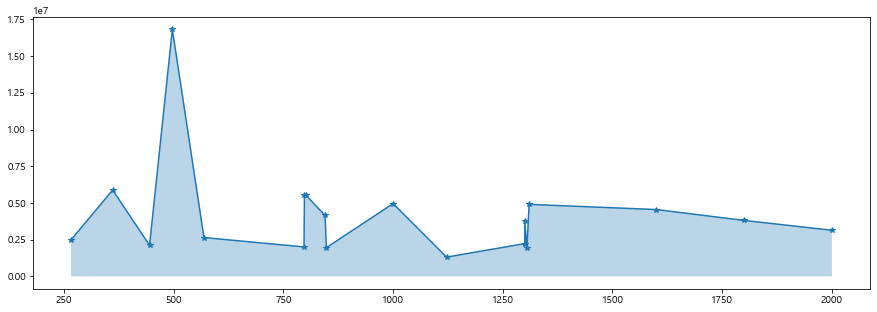

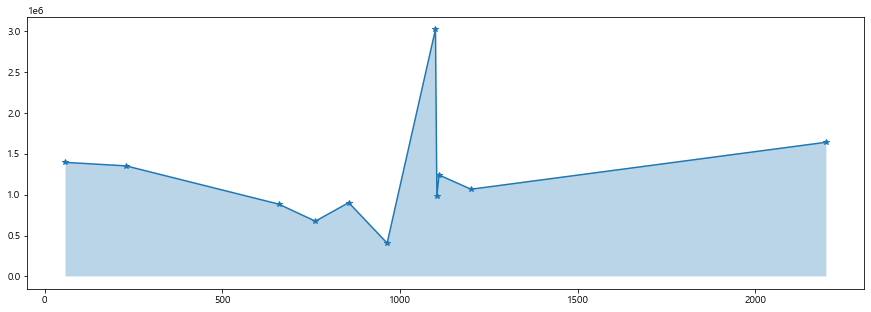

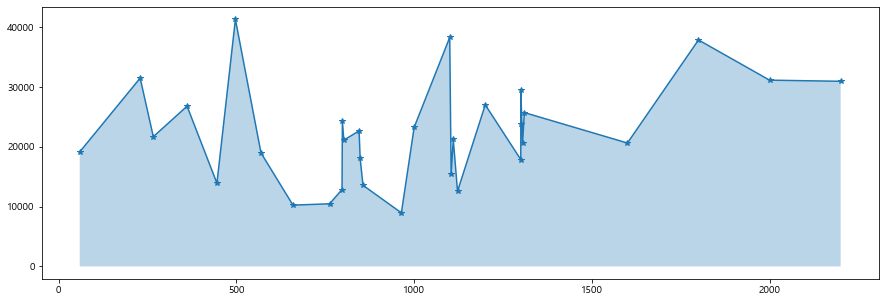

In [21]:
###규모 별 거리 당 매출 분석
medium_sale = only_sale(medium_sale_dic)
small_sale = only_sale(small_sale_dic)
#둘을 list로 묶어줘야 함
medium_sale_dis_list = []
small_sale_dis_list = []
for i in range(len(medium_sale)):
    medium_sale_dis_list.append([medium_market_distance[i], medium_sale[i]])
for i in range(len(small_sale)):
    small_sale_dis_list.append([small_market_distance[i], small_sale[i]])
medium_sale_dis_list = sorted(medium_sale_dis_list)
small_sale_dis_list = sorted(small_sale_dis_list)

graph_distance(medium_sale_dis_list)
graph_distance(small_sale_dis_list)

###단위당 매출분석
total_sale = only_sale(total_sale_dic)
total_sale_dis_list = []
for i in range(len(total_sale)):
    total_sale_dis_list.append([total_market_distance[i], total_sale[i]])
total_sale_dis_list = sorted(total_sale_dis_list)
    
graph_distance(total_sale_dis_list) # 이게 점포 당 매출 거라 당 매출분석

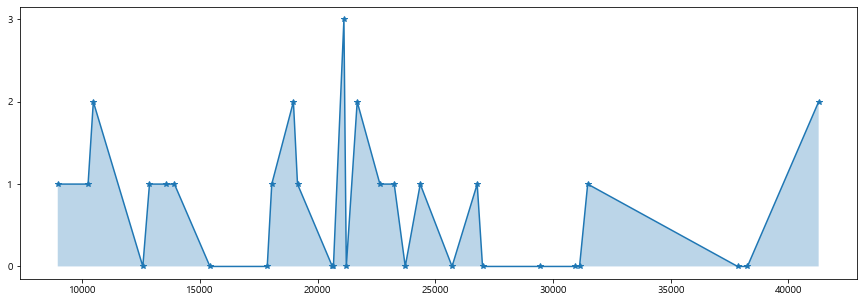

In [22]:
### 1km 반경 내 매출차이
# 막대로
medium_market_radius = [2,3,1,1,2,0,0,0,0,1,2,0,0,1,1,0,0,1,1,0]
small_market_radius = [1,2,0,0,0,1,1,0,1,1,0]
total_market_radius = medium_market_radius + small_market_radius
# for i in range(len(total_market_radius)):
#     total_market_radius[i] = total_market_radius[i]+1

total_sale
total_sale_radius_list = []
for i in range(len(total_sale)):
    total_sale_radius_list.append([total_sale[i],total_market_radius[i]])
total_sale_radius_list = sorted(total_sale_radius_list)

graph_distance_radius(total_sale_radius_list)

In [23]:
import seaborn as sns

[[43], [66], [50], [103], [144], [171], [74]]


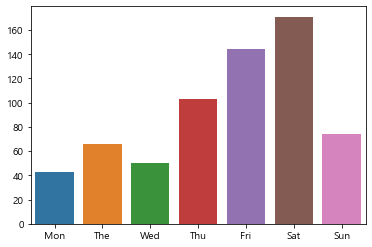

In [44]:
# 요일 별 매출 순위
# total_market_list
temp_list = [1,2,3,4,5,6,7]
cnt_weekday = [0,0,0,0,0,0,0]
column = ['Mon','The','Wed','Thu','Fri','Sat','Sun']
for i in total_market_list:
    ma_list = market_cal(i, sales_2017_f)
    ma_sum = []
    for k in range(7):
        ma_sum.append(sum(ma_list[k]))
        
    temp = list(zip(ma_sum, temp_list))
    temp = sorted(temp)
    
    #temp.sort(key = lambda x:x[1])
    for j in range(7):
        if temp[j][1] == 1:
            cnt_weekday[0] = cnt_weekday[0] + j
        elif temp[j][1] == 2:
            cnt_weekday[1] = cnt_weekday[1] + j
        elif temp[j][1] == 3:
            cnt_weekday[2] = cnt_weekday[2] + j
        elif temp[j][1] == 4:
            cnt_weekday[3] = cnt_weekday[3] + j
        elif temp[j][1] == 5:
            cnt_weekday[4] = cnt_weekday[4] + j
        elif temp[j][1] == 6:
            cnt_weekday[5] = cnt_weekday[5] + j
        elif temp[j][1] == 7:
            cnt_weekday[6] = cnt_weekday[6] + j

cnt_weekday_ = []
for k in range(7):     
    cnt_weekday_.append([cnt_weekday[k]])
print(cnt_weekday_)

dict = {'Mon':[cnt_weekday[0]],'The':[cnt_weekday[1]],'Wed':[cnt_weekday[2]],'Thu':[cnt_weekday[3]],'Fri':[cnt_weekday[4]],'Sat':[cnt_weekday[5]],'Sun':[cnt_weekday[6]]}
# weekday_on_df = pd.DataFrame(cnt_weekday_, columns = column)
dict_df = pd.DataFrame(dict)

sns.barplot(data=dict_df)
# plt.bar(temp_list,cnt_weekday, color='b', width = 0.7)
# plt.xticks(temp_list, column)
# plt.show()

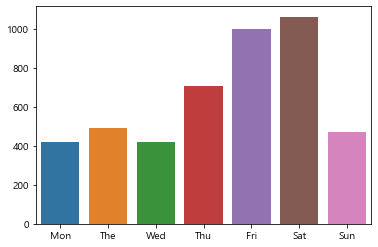

In [45]:
def all_m_name(data):
    market = data[(data['상권_구분_코드_명'] == "전통시장") & (data['기준_분기_코드'] == 4)]
    market_list = market['상권_코드_명'].tolist()
    market_list = sorted(list(set(market_list)))
    return market_list


# 요일 별 매출 순위 - 전체시장
# total_market_list
temp_list = [1,2,3,4,5,6,7]
cnt_weekday_all = [0,0,0,0,0,0,0]

all_market = all_m_name(sales_2017_f)
# print(all_market)

for i in all_market:
    ma_list = market_cal(i, sales_2017_f)
    ma_sum = []
    for k in range(7):
        ma_sum.append(sum(ma_list[k]))
        
    temp = list(zip(ma_sum, temp_list))
    temp = sorted(temp)
    
    #temp.sort(key = lambda x:x[1])
    for j in range(7):
        if temp[j][1] == 1:
            cnt_weekday_all[0] = cnt_weekday_all[0] + j
        elif temp[j][1] == 2:
            cnt_weekday_all[1] = cnt_weekday_all[1] + j
        elif temp[j][1] == 3:
            cnt_weekday_all[2] = cnt_weekday_all[2] + j
        elif temp[j][1] == 4:
            cnt_weekday_all[3] = cnt_weekday_all[3] + j
        elif temp[j][1] == 5:
            cnt_weekday_all[4] = cnt_weekday_all[4] + j
        elif temp[j][1] == 6:
            cnt_weekday_all[5] = cnt_weekday_all[5] + j
        elif temp[j][1] == 7:
            cnt_weekday_all[6] = cnt_weekday_all[6] + j
            
dict_a = {'Mon':[cnt_weekday_all[0]],'The':[cnt_weekday_all[1]],'Wed':[cnt_weekday_all[2]],'Thu':[cnt_weekday_all[3]],'Fri':[cnt_weekday_all[4]],'Sat':[cnt_weekday_all[5]],'Sun':[cnt_weekday_all[6]]}
dict_a_df = pd.DataFrame(dict_a)
sns.barplot(data=dict_a_df)

            
# plt.bar(temp_list,cnt_weekday_all, color='r')
# plt.xticks(temp_list, column)
# plt.show()

In [285]:
#시장별 거리, 반경(1km)
#large
"영등포전통시장" = 650,3
#medium
"경동시장" = 497,2
"동원시장" = 802,3
"새마을시장" = 361, 1
"방이시장" = 1000, 1
"남문시장" = 569,2
"상도전통시장" = 1300, 0
"모래내시장" = 1100, 0
"석촌시장" = 1300, 0 # 방이시장 겹
"노량진중앙시장" = 1800, 0 # 상도시장 겹
"방신전통시장" = 848, 1
"숭인시장" = 266, 2
"아현시장" = 1300, 0
"남구로시장" = 1300, 0
"현대시장" = 845, 1 # 남문시장 겹
"수유전통시장" = 798,1
"암사종합시장" = 1300, 0
"중부시장" = 2000, 0
"사가정시장" = 797, 1
"연서시장" = 445, 1
"종로신진시장" = 1600, 0 # 중부시장 겹
#small
"길음시장" = 856,1 #숭인시장 겹
"구로시장" = 762, 2 #남구로시장 겹
"금남시장" = 1100, 0
"망원월드컵시장" = 1100, 0
"회기시장" = 1100, 0
"우이시장" = 59, 1
"강남개포시장" = 659, 1
"낙성대시장" = 2200, 0
"공덕시장" = 229, 1
"봉일시장" = 964, 1
"태능시장" = 1200, 0

SyntaxError: cannot assign to literal (<ipython-input-285-044a9d94ccd9>, line 3)